In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df= pd.read_csv("langeasy_audio(19th-to-21st-june).csv")
df.sample(5)

fileId  \
64060  66754dddbb37564910b9b377   
48401  6674a838bb37564910b6cf9b   
64364  6675525cbb37564910b9e8c2   
67064  66753ff1bb37564910b925eb   
83884  6674cca0bb37564910b7ff54   

                                                filePath  \
64060  production/Speak/Igbo/awarrilangeasecaptured_2...   
48401  production/Record/English/awarrilangeasecaptur...   
64364  production/Speak/Igbo/awarrilangeasecaptured_2...   
67064  production/Record/English/awarrilangeasecaptur...   
83884  production/Speak/Igbo/awarrilangeasecaptured_2...   

                                                fileName  \
64060  awarrilangeasecaptured_2024-06-21_09-54-36_spe...   
48401  awarrilangeasecaptured_2024-06-20_22-07-52_rec...   
64364  awarrilangeasecaptured_2024-06-21_10-13-47_spe...   
67064  awarrilangeasecaptured_2024-06-21_08-55-13_rec...   
83884  awarrilangeasecaptured_2024-06-21_00-43-12_spe...   

                     dialogueId             subDialogueId  oratoryId  \
64060  66728fff6b5f97f3d0d54cef  66728fff6b5f97f3d0d54cf2        NaN   
48401  667251ab6b5f97f3d0d3a55b  667251ac6b5f97f3d0d3a562        NaN   
64364  6672a9de6b5f97f3d0d607d7  6672a9df6b5f97f3d0d607dc        NaN   
67064  667297566b5f97f3d0d58b20  667297566b5f97f3d0d58b23        NaN   
83884  66729b736b5f97f3d0d5adab  66729b746b5f97f3d0d5adb0        NaN   

                         userId  \
64060  66695e5419bff244d8a50f38   
48401  6667fe3a70d14cc883d831c0   
64364  66684fde70d14cc883d8bc6d   
67064  6667f54470d14cc883d82c63   
83884  6661626c43f7452b3952161f   

                                                    text audioLanguage  \
64060      \"I'm always stressed about transportation.\"          igbo   
48401                              Stressed about bills?       english   
64364  Having children often motivates parents to adv...          igbo   
67064                        You seem less enthusiastic.       english   
83884  Encourage them to ask questions and seek answers.          igbo   

                                          translatedText  ...  \
64060  \"M na-enwe nrụgide mgbe niile gbasara ụgbọ nj...  ...   
48401                                                NaN  ...   
64364  Inwe ụmụaka na-akpalikarị ndị nne na nna ịkwad...  ...   
67064                                                NaN  ...   
83884         Gbaa ha ume ka ha jụọ ajụjụ ma chọọ azịza.  ...   

                                                  domain  \
64060  Complaining to family members on why you need ...   
48401  Sharing Tips for improving finances in these d...   
64364           Discussing the impact of having children   
67064  Discussing issues that come with not getting e...   
83884  Sharing Tips to young children on becoming the...   

                                                scenario userFirstname  \
64060  Health and Well-being_ Emphasizing the impact ...          Hope   
48401                                Community Resources           Ali   
64364  Community Engagement_ Exploring the role of pa...     Onuabuchi   
67064  Work Performance_ Exploring the impact of inad...         Salma   
83884  Lifelong Learning_ Fostering a love for learni...         OKOHU   

          userLastname                         userEmail userGender userAge  \
64060           Umunna       joycee4excellence@gmail.com     female    28.0   
48401         Muhammad            amdallari001@gmail.com       male    32.0   
64364           Nwafor  nwaforonuabuchipauline@gmail.com     female    35.0   
67064  Abdullahi Saeed              sasaeed092@gmail.com     female    28.0   
83884    DORIS MUNACHI             dorismuna44@gmail.com     female    23.0   

      userAccent  duration duration_hours  
64060       Igbo      4.38       0.001217  
48401      Hausa      3.90       0.001083  
64364    English      9.24       0.002567  
67064      Hausa      3.00       0.000833  
83884       Igbo      4.14       0.001150  

[5 rows x 22 columns]

In [ ]:
df.shape

(85618, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85618 entries, 0 to 85617
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fileId          85618 non-null  object 
 1   filePath        85618 non-null  object 
 2   fileName        85618 non-null  object 
 3   dialogueId      85618 non-null  object 
 4   subDialogueId   85618 non-null  object 
 5   oratoryId       0 non-null      float64
 6   userId          85618 non-null  object 
 7   text            85618 non-null  object 
 8   audioLanguage   85618 non-null  object 
 9   translatedText  42457 non-null  object 
 10  identifier      85618 non-null  object 
 11  DialogueTitle   85618 non-null  object 
 12  domain          85618 non-null  object 
 13  scenario        85618 non-null  object 
 14  userFirstname   85618 non-null  object 
 15  userLastname    85618 non-null  object 
 16  userEmail       85618 non-null  object 
 17  userGender      85618 non-null 

In [ ]:
df.isnull().sum()

fileId                0
filePath              0
fileName              0
dialogueId            0
subDialogueId         0
oratoryId         85618
userId                0
text                  0
audioLanguage         0
translatedText    43161
identifier            0
DialogueTitle         0
domain                0
scenario              0
userFirstname         0
userLastname          0
userEmail             0
userGender            0
userAge               0
userAccent            0
duration              0
duration_hours        0
dtype: int64

In [ ]:
df.dtypes

fileId             object
filePath           object
fileName           object
dialogueId         object
subDialogueId      object
oratoryId         float64
userId             object
text               object
audioLanguage      object
translatedText     object
identifier         object
DialogueTitle      object
domain             object
scenario           object
userFirstname      object
userLastname       object
userEmail          object
userGender         object
userAge           float64
userAccent         object
duration          float64
duration_hours    float64
dtype: object

In [ ]:
# Checking for dupplicate values
duplicates= df.duplicated(subset= ['userId'])
len(df[duplicates])

85029

In [ ]:
# Checking for candidates with the highest no of work done using userID
df.userId.value_counts()

userId
6667f65570d14cc883d82cd2    509
66672e97fb189b2d8ae0b1e8    484
6667316bfb189b2d8ae0c3ea    474
6667fff270d14cc883d8331a    466
66672975fb189b2d8ae09290    462
                           ... 
6668822170d14cc883d8d2cd      1
666767bafb189b2d8ae165fd      1
666b616b19bff244d8a67bc4      1
6668a2b870d14cc883d8df5c      1
667305e354081acd5a9154fc      1
Name: count, Length: 589, dtype: int64

In [ ]:
# Checking for candidates with the highest no of work done using userEmail
df.userEmail.value_counts()

userEmail
abbas_labaran@yahoo.com         509
f_egbu@yahoo.com                484
nicholasiberedem01@gmail.com    474
musamuhammed122@gmail.com       466
salisukhadija072@gmail.com      462
                               ... 
donswiss60@gmail.com              1
juschris2k@gmail.com              1
eneze2410@gmail.com               1
nzubennabuo1996@gmail.com         1
adeyexcel01+40@gmail.com          1
Name: count, Length: 589, dtype: int64

In [ ]:
# User with the most job count
df[df['userId'] == '6667f65570d14cc883d82cd2'][:5]

fileId  \
278  66729900b4227876f52d623c   
287  66729a9fb4227876f52d6d90   
361  66729a23b4227876f52d6b27   
393  6672a414b4227876f52de925   
422  66729e75b4227876f52dc825   

                                              filePath  \
278  production/Speak/Hausa/awarrilangeasecaptured_...   
287  production/Speak/Hausa/awarrilangeasecaptured_...   
361  production/Speak/Hausa/awarrilangeasecaptured_...   
393  production/Speak/Hausa/awarrilangeasecaptured_...   
422  production/Speak/Hausa/awarrilangeasecaptured_...   

                                              fileName  \
278  awarrilangeasecaptured_2024-06-19_08-38-24_spe...   
287  awarrilangeasecaptured_2024-06-19_08-45-19_spe...   
361  awarrilangeasecaptured_2024-06-19_08-43-15_spe...   
393  awarrilangeasecaptured_2024-06-19_09-25-39_spe...   
422  awarrilangeasecaptured_2024-06-19_09-01-40_spe...   

                   dialogueId             subDialogueId  oratoryId  \
278  667214f56b5f97f3d0d1fd75  667214f56b5f97f3d0d1fd78        NaN   
287  667215076b5f97f3d0d1fe05  667215076b5f97f3d0d1fe08        NaN   
361  667214fe6b5f97f3d0d1fdbd  667214fe6b5f97f3d0d1fdc0        NaN   
393  667215396b5f97f3d0d1ff8e  667215396b5f97f3d0d1ff93        NaN   
422  667215316b5f97f3d0d1ff4f  667215316b5f97f3d0d1ff54        NaN   

                       userId  \
278  6667f65570d14cc883d82cd2   
287  6667f65570d14cc883d82cd2   
361  6667f65570d14cc883d82cd2   
393  6667f65570d14cc883d82cd2   
422  6667f65570d14cc883d82cd2   

                                                  text audioLanguage  \
278     How do you become a recognized thought leader?         hausa   
287       How do you choose thought leadership topics?         hausa   
361  How do you establish thought leadership on Lin...         hausa   
393  Highlight your unique skills and experiences t...         hausa   
422  Use concise language and focus on what makes y...         hausa   

                                        translatedText  ...  \
278        Ta yaya za ka zama sanannen jagoran tunani?  ...   
287            Ta yaya kuke zabar batutuwan jagoranci?  ...   
361  Ta yaya zaku kafa jagoranci tunani akan LinkedIn?  ...   
393  Nuna ƙwarewarka na musamman da gogewa waɗanda ...  ...   
422  Yi amfani da taƙaitaccen harshe kuma ka mai da...  ...   

                                 domain  \
278  Sharing Tips for Personal Branding   
287  Sharing Tips for Personal Branding   
361  Sharing Tips for Personal Branding   
393  Sharing Tips for Personal Branding   
422  Sharing Tips for Personal Branding   

                                              scenario  userFirstname  \
278  Thought Leadership_ Strategies for establishin...  Abbas Labaran   
287  Thought Leadership_ Strategies for establishin...  Abbas Labaran   
361  Thought Leadership_ Strategies for establishin...  Abbas Labaran   
393  Value Proposition_ Helping individuals define ...  Abbas Labaran   
422  Value Proposition_ Helping individuals define ...  Abbas Labaran   

    userLastname                userEmail userGender userAge userAccent  \
278        Tanko  abbas_labaran@yahoo.com       male    36.0      Hausa   
287        Tanko  abbas_labaran@yahoo.com       male    36.0      Hausa   
361        Tanko  abbas_labaran@yahoo.com       male    36.0      Hausa   
393        Tanko  abbas_labaran@yahoo.com       male    36.0      Hausa   
422        Tanko  abbas_labaran@yahoo.com       male    36.0      Hausa   

      duration duration_hours  
278   7.830938       0.002175  
287   5.468312       0.001519  
361   9.322812       0.002590  
393  12.631667       0.003509  
422  13.380500       0.003717  

[5 rows x 22 columns]

In [ ]:
# Top 20 candidates with the highest job count
df.userId.value_counts()[:20]


userId
6667f65570d14cc883d82cd2    509
66672e97fb189b2d8ae0b1e8    484
6667316bfb189b2d8ae0c3ea    474
6667fff270d14cc883d8331a    466
66672975fb189b2d8ae09290    462
66673c41fb189b2d8ae1000f    461
666746f9fb189b2d8ae134f6    459
66672f51fb189b2d8ae0b640    454
66674608fb189b2d8ae13016    449
66682e3570d14cc883d88f87    449
666740e9fb189b2d8ae11e48    447
66677a0cfb189b2d8ae1737a    447
666729befb189b2d8ae09520    446
66676e4bfb189b2d8ae16d58    445
666732eefb189b2d8ae0cdbd    445
66674046fb189b2d8ae11828    441
6667dc7170d14cc883d82711    438
66673e4bfb189b2d8ae10bf7    436
66683cc270d14cc883d899bd    435
66681d3370d14cc883d88294    434
Name: count, dtype: int64

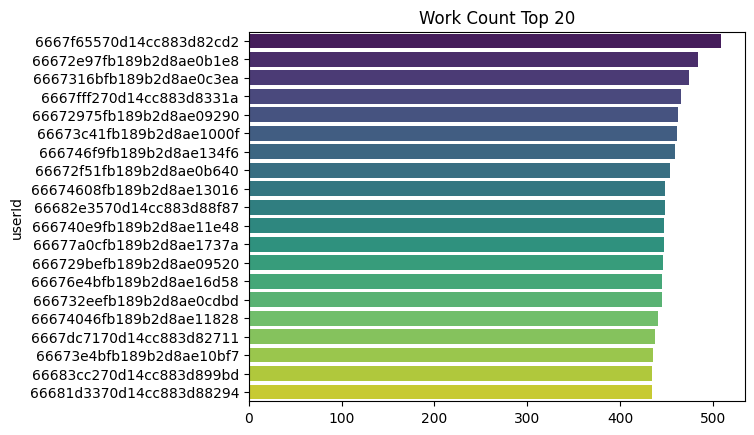

In [ ]:
# Distribution of top 20 candidates with the most job
work_count_top20= df.userId.value_counts()[:20]
sns.barplot(y=work_count_top20.index, x=work_count_top20.values, hue=work_count_top20.index, palette= 'viridis')
plt.title('Work Count Top 20')
plt.show()


<ipython-input-14-f509d7505166>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=work_count_top20.index, x=work_count_top20.values, palette= 'viridis')


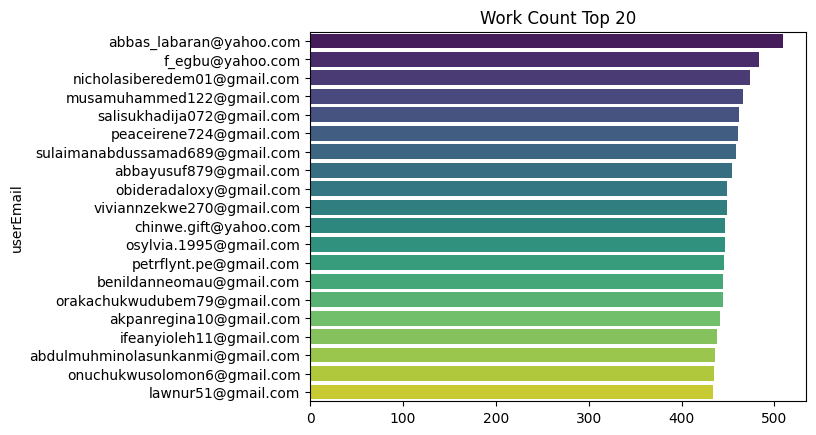

In [ ]:
# Distribution of top 20 candidates with the most job using userEmail for easy identification
work_count_top20= df.userEmail.value_counts()[:20]
sns.barplot(y=work_count_top20.index, x=work_count_top20.values, palette= 'viridis')
plt.title('Work Count Top 20')
plt.show()


In [ ]:
# Checking the total number of candidates
len(df.userEmail.unique())


589

In [ ]:
# Unique no of candidates
unique_candidates= df.groupby(['userEmail', 'userGender']).size()
len(unique_candidates)
589

589

In [ ]:
unique_candidates


userEmail                    userGender
004sas@gmail.com             male            4
ab4update@gmail.com          male           95
abanaonyeka86@gmail.com      male          130
abasifrekeudosen4@gmail.com  male          303
abbas.sabitu48@gmail.com     male          256
                                          ... 
zainabjibo@gmail.com         female         32
zamau2013@gmail.com          male            6
zarabukarsheriff@gmail.com   female        313
zaynerbabdul@gmail.com       female         56
zinny4ya@gmail.com           female          9
Length: 589, dtype: int64

In [ ]:
unique_candidates.name='Total'
unique_candidates= unique_candidates.reset_index()
unique_candidates



userEmail userGender  Total
0               004sas@gmail.com       male      4
1            ab4update@gmail.com       male     95
2        abanaonyeka86@gmail.com       male    130
3    abasifrekeudosen4@gmail.com       male    303
4       abbas.sabitu48@gmail.com       male    256
..                           ...        ...    ...
584         zainabjibo@gmail.com     female     32
585          zamau2013@gmail.com       male      6
586   zarabukarsheriff@gmail.com     female    313
587       zaynerbabdul@gmail.com     female     56
588           zinny4ya@gmail.com     female      9

[589 rows x 3 columns]

In [ ]:
# Checking for the total number of male and female candidates
gender_count= unique_candidates.userGender.value_counts()
gender_count


userGender
male      308
female    281
Name: count, dtype: int64

<ipython-input-20-95af19302ab1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_count.index, y= gender_count.values, palette= 'viridis')


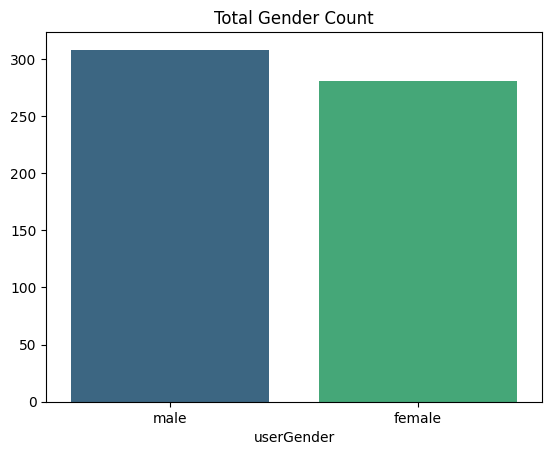

In [ ]:
# Distribution for the candidates' genders
sns.barplot(x=gender_count.index, y= gender_count.values, palette= 'viridis')
plt.title('Total Gender Count')
plt.show()



In [ ]:
# Checking the language and gender count using language of the audio recorded
lang_gender_count= df.groupby(['audioLanguage', 'userGender']).size()
lang_gender_count



audioLanguage  userGender
english        female        22577
               male          20585
hausa          female         3498
               male           4959
ibibio         female         3291
               male           3509
igbo           female        10125
               male           5607
pidgin         female         1303
               male           2279
yoruba         female         3978
               male           3907
dtype: int64

In [ ]:
lang_gender_count.unstack()


userGender     female   male
audioLanguage               
english         22577  20585
hausa            3498   4959
ibibio           3291   3509
igbo            10125   5607
pidgin           1303   2279
yoruba           3978   3907

In [ ]:
lang_gender_count.name= 'Total'


In [ ]:
# Rearranging the data for plotting
lang_gender_count.name= 'Total'
lang_gender_count= lang_gender_count.reset_index()
lang_gender_count


audioLanguage userGender  Total
0        english     female  22577
1        english       male  20585
2          hausa     female   3498
3          hausa       male   4959
4         ibibio     female   3291
5         ibibio       male   3509
6           igbo     female  10125
7           igbo       male   5607
8         pidgin     female   1303
9         pidgin       male   2279
10        yoruba     female   3978
11        yoruba       male   3907

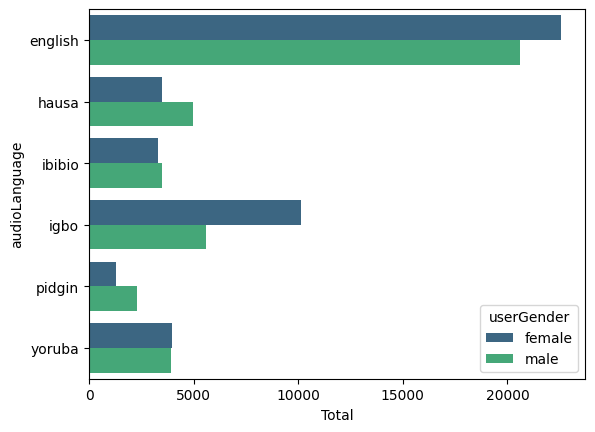

In [ ]:
# Visualization showing gender distribution in each language
sns.barplot(x='Total', y='audioLanguage', data=lang_gender_count, hue='userGender', palette='viridis')
plt.show()



In [ ]:
# No of unique languages worked on
lang_count= df.audioLanguage.value_counts()
lang_count


audioLanguage
english    43162
igbo       15732
hausa       8457
yoruba      7885
ibibio      6800
pidgin      3582
Name: count, dtype: int64

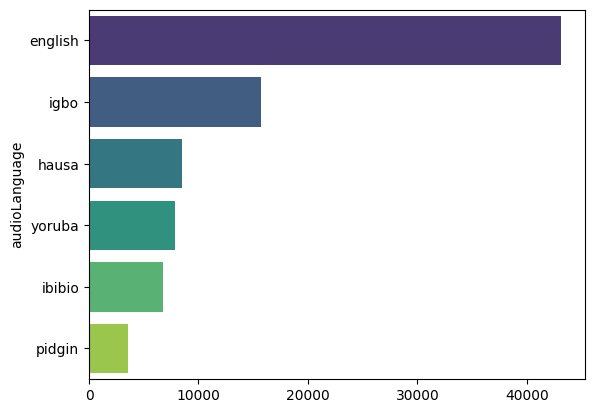

In [ ]:
# Distribution for languages worked on
sns.barplot(y=lang_count.index, x=lang_count.values, hue=lang_count.index, palette='viridis')
plt.show()


In [ ]:
df.identifier.value_counts()


identifier
B                  42312
A                  41466
Individual B         864
Individual A         482
12. A                  8
                   ...  
Dialogue 16            2
19.Individual A        2
Dialogue 33A           2
18. A                  2
Dialogue 19A           2
Name: count, Length: 122, dtype: int64

In [ ]:
df.identifier.unique()


array(['A', 'B', 'Individual B', 'Individual A', 'Dialogue 16',
       'Dialogue 2', 'Dialogue 5', 'Dialogue 13', 'Dialogue 9',
       'Dialogue 7', 'Dialogue 11', 'Dialogue 3', 'Dialogue 15',
       'Dialogue 12', 'Dialogue 17', 'Dialogue 19', 'lA', 'Dialogue 1',
       'Dialogue 6', 'Dialogue 10', 'Dialogue 14', 'Dialogue 18',
       'Dialogue 20', '24. A', '34. A', 'Dialogue 35A', 'Dialogue 15A',
       'Dialogue 30A', '7. A', '47. A', '26. A', 'Dialogue 11A', 'A ',
       'Dialogue 5A', '40. A', 'Dialogue 41A', '11. A', '42. A',
       'Dialogue 6A', 'Dialogue 29A', '43. A', 'Dialogue 47A',
       'Dialogue 28A', 'Dialogue 14A', 'Dialogue 24A', '10. A', '14. A',
       '39. A', 'Dialogue 18A', 'Dialogue 20A', '45. A', '4. A', '49. A',
       '8. A', '30. A', 'Dialogue 8A', 'Dialogue 16A', 'Dialogue 21A',
       'to our relationship.B', 'Dialogue 9A', '15. A', 'Dialogue 34A',
       '22. A', 'Dialogue 39A', 'Dialogue 48A', 'Dialogue 12A',
       'Dialogue 23A', 'Dialogue 38A', 'Dial

In [ ]:
len(df.domain.unique())


62

In [ ]:
df.domain.value_counts()


domain
Planning a department reunion with old time coursemates                                      2725
Discussing the Influence of Literature on Society                                            2715
Planning a Community Educational Workshop                                                    2697
Describing yourself to an audience of interest                                               2656
Discussing issues that come with not getting enough rest                                     2493
                                                                                             ... 
Sharing Tips for Stress Management                                                            186
Talking about why we don’t need to go to church as much as we did in ancient times Domain     182
Planning a fun day at the park for children                                                    79
Planning a Community Arts Festival                                                             61
Discussing th

In [ ]:
df.scenario.unique()


array(['Food and beverage', 'Healthcare_pharmaceuticals',
       'Legal services', ..., 'Innovations in Nigerian Cooking_',
       'Sponsorship and Fundraising_ Seeking sponsorship opportunities from local businesses, corporations, and community organizations to secure funding for the event, covering expenses such as venue rental, equipment, and prizes_',
       'Personal Freedom_ Stressing the importance of personal freedom and the ability to make independent decisions about transportation choices, which is enhanced by owning a car_'],
      dtype=object)

In [ ]:
len(df.scenario.unique())

1082

In [ ]:
data= df[['userId', 'text', 'audioLanguage', 'identifier', 'domain', 'scenario', 'userFirstname', 'userLastname', 'userGender', 'userAge', 'userAccent', 'duration']]
data.sample(5)



userId  \
41879  665f2a14259d99a2699739e7   
64122  66677a0cfb189b2d8ae1737a   
14856  666839f870d14cc883d89843   
68373  66603fddd879e639d14ab318   
59718  666cb32ad2bd334768e38252   

                                                    text audioLanguage  \
41879  They can add warmth and texture to seating are...        yoruba   
64122  Good day. How do we ensure operational efficie...        ibibio   
14856  Cultural competency training for local busines...       english   
68373  Absolutely. Women's economic empowerment is no...       english   
59718          Resilience thrives in the face of change.       english   

      identifier                                             domain  \
41879          B            Planning a Budget for a Home Renovation   
64122          A  Addressing potential investors on the need for...   
14856          A    Discussing the Importance of Cultural Diversity   
68373          B  Exploring Different poverty alleviation strate...   
59718          B                Sharing Personal Growth Experiences   

                                                scenario userFirstname  \
41879                Decorative elements and accessories     Adesanya    
64122           International Expansion and Global Reach       Sylvia    
14856  Community Integration_ Supporting the integrat...        Phina    
68373  Microfinance_ Examining the effectiveness of m...       Anietie   
59718       Cultivating resilience and coping strategies      Emmanuel   

      userLastname userGender  userAge userAccent   duration  
41879    Folakemi      female     24.0     Yoruba  14.421333  
64122        Okon      female     28.0     Ibibio   6.900000  
14856      Chukwu      female     27.0       Igbo  10.680000  
68373       Bassey       male     37.0    English  18.600000  
59718        Antai       male     36.0     Ibibio   3.720000

In [ ]:
data.shape


(85618, 12)

In [ ]:
# Creating a new column for the full name of the user
data['fullName']= data['userFirstname'] + ' ' + data['userLastname']
data[:5]





<ipython-input-36-88339384a3a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fullName']= data['userFirstname'] + ' ' + data['userLastname']


userId  \
0  66672f51fb189b2d8ae0b640   
1  66672f51fb189b2d8ae0b640   
2  66688bff70d14cc883d8d7d8   
3  66672f51fb189b2d8ae0b640   
4  66672f51fb189b2d8ae0b640   

                                                text audioLanguage identifier  \
0  Expresses interest in an online marketplace bu...         hausa          A   
1  Seeks a reliable partner to conduct clinical t...         hausa          A   
2  Expresses interest in rooftop garden technolog...          igbo          A   
3  Acknowledges the innovation of virtual reality...         hausa          A   
4  Expresses interest in partnering for a clinica...         hausa          A   

                        domain                    scenario  \
0  Negotiating a Business Deal           Food and beverage   
1  Negotiating a Business Deal  Healthcare_pharmaceuticals   
2  Negotiating a Business Deal           Food and beverage   
3  Negotiating a Business Deal  Healthcare_pharmaceuticals   
4  Negotiating a Business Deal  Healthcare_pharmaceuticals   

          userFirstname userLastname userGender  userAge userAccent  duration  \
0                  Abba        Adamu       male     31.0      Hausa      7.98   
1                  Abba        Adamu       male     31.0      Hausa      7.26   
2  Augustus Chukwuebuka   Okoronnaya       male     31.0       Igbo     14.16   
3                  Abba        Adamu       male     31.0      Hausa     11.22   
4                  Abba        Adamu       male     31.0      Hausa      6.60   

                          fullName  
0                       Abba Adamu  
1                       Abba Adamu  
2  Augustus Chukwuebuka Okoronnaya  
3                       Abba Adamu  
4                       Abba Adamu

In [ ]:
data['clean_identifier']= np.where(data['identifier'].str.contains('A'), 'A', 'B')
data.sample(5)




<ipython-input-37-5c3c5ad63ca7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_identifier']= np.where(data['identifier'].str.contains('A'), 'A', 'B')


userId  \
73894  66673cd4fb189b2d8ae10470   
36608  6667316bfb189b2d8ae0c3ea   
24553  6667dc7170d14cc883d82711   
63809  6667f41e70d14cc883d82bde   
30401  66673180fb189b2d8ae0c426   

                                                    text audioLanguage  \
73894        Failure isn't the end, but a new beginning.       english   
36608        What sets Noah apart from other candidates?       english   
24553  Did you know there might be tax benefits for c...       english   
63809  Hi! That's impactful. My goal is to promote ac...         hausa   
30401  Yes, with a flavorful blend of spices on grill...          igbo   

      identifier                                             domain  \
73894          A  Explaining the importance of not dwelling on s...   
36608          A  Explaining why someone is the best man for the...   
24553          A  Sharing Tips for improving finances in these d...   
63809          B     Describing yourself to an audience of interest   
30401          B                Comparing Different Cooking Recipes   

                                                scenario      userFirstname  \
73894  Learning from Failure_ Highlighting the import...           Chizoba    
36608  Strategic Thinking and Planning_ Demonstrating...           Iberedem   
24553                                       Tax Planning  Ifeanyi Innocent    
63809                      Future Goals and Aspirations_            Nafisat   
30401                         Traditional family recipes        Ihechiluru    

      userLastname userGender  userAge userAccent  duration  \
73894      Awuzie      female     35.0       Igbo      3.66   
36608     Nicholas       male     27.0     Anaang      5.16   
24553         Oleh       male     33.0       Igbo      6.30   
63809       Aliyu      female     32.0      Hausa     14.04   
30401       Okoro      female     26.0       Igbo      7.08   

                     fullName clean_identifier  
73894        Chizoba  Awuzie                 A  
36608       Iberedem Nicholas                A  
24553  Ifeanyi Innocent  Oleh                A  
63809          Nafisat Aliyu                 B  
30401      Ihechiluru  Okoro                 B

In [ ]:
identifier_count= data.clean_identifier.value_counts()
identifier_count




clean_identifier
B    43216
A    42402
Name: count, dtype: int64

In [ ]:
len(data.clean_identifier)



85618

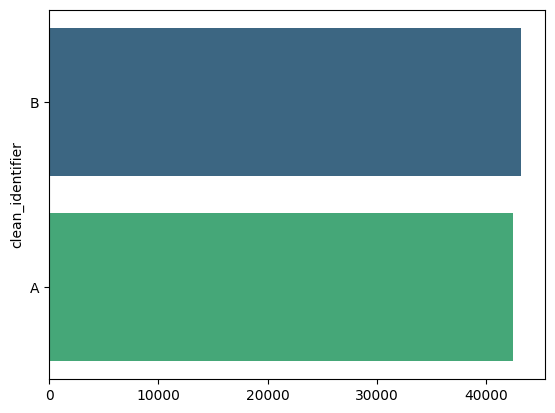

In [ ]:
sns.barplot(y=identifier_count.index, x=identifier_count.values, hue=identifier_count.index, palette='viridis')
plt.show()




In [ ]:
# Checking for users who use gmail and those who don't
data['mail']= np.where(df['userEmail'].str.contains('gmail'), 'gmail', 'not gmail')
data.sample(5)




<ipython-input-41-e1c886bae8b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mail']= np.where(df['userEmail'].str.contains('gmail'), 'gmail', 'not gmail')


userId  \
38494  66675196fb189b2d8ae146cc   
55414  66674e2cfb189b2d8ae142c3   
17911  6668cc1170d14cc883d8ec11   
18007  66677027fb189b2d8ae16e71   
56697  6660c3bb89a9eda2d9d1ba60   

                                                    text audioLanguage  \
38494  Mia's networking prowess and relationship-buil...       english   
55414  What's your take on the concept of the speed o...       english   
17911  I dedicate time to self-education and skill de...       english   
18007  Yes, it's budget-friendly and adds to the adve...       english   
56697         No, I haven't tried it yet. How about you?       english   

      identifier                                             domain  \
38494          B  Explaining why someone is the best man for the...   
55414          A                     Explaining a Scientific Theory   
17911          B                   Sharing Tips for Time Management   
18007          B  Planning a trip to village with family and fri...   
56697          B        Exploring Different ways to talk to a crush   

                                                scenario userFirstname  \
38494  Networking and Relationship Building_ Discussi...     Chiamaka    
55414                                  Relativity theory      Ibrahim    
17911  Learning and Development_ Discussing the role ...      Halimat    
18007  Budgeting and Expense Management_ Planning and...         Orji    
56697  Respecting Boundaries_ Exploring the importanc...    Elizabeth    

      userLastname userGender  userAge userAccent  duration  \
38494      Agugua      female     29.0    English     9.240   
55414     Ojulari        male     28.0     Yoruba     4.980   
17911      Hassan      female     24.0     Yoruba     5.640   
18007     Francis        male     20.0       Igbo     4.592   
56697   Eromosele      female     43.0     Yoruba     5.160   

                    fullName clean_identifier   mail  
38494      Chiamaka  Agugua                 B  gmail  
55414      Ibrahim  Ojulari                 A  gmail  
17911       Halimat  Hassan                 B  gmail  
18007         Orji  Francis                 B  gmail  
56697  Elizabeth  Eromosele                 B  gmail

In [ ]:
mail_count= data.mail.value_counts()
mail_count

mail
gmail        82674
not gmail     2944
Name: count, dtype: int64

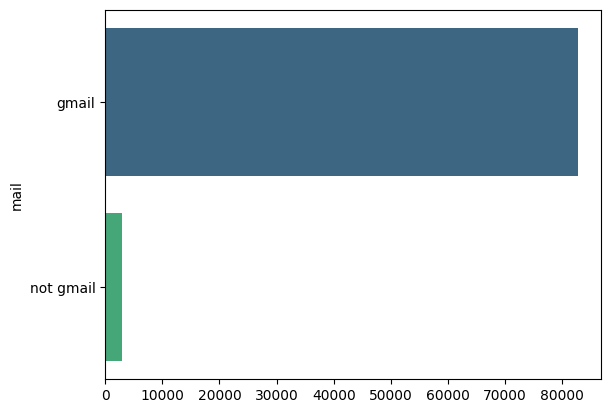

In [ ]:
sns.barplot(y=mail_count.index, x=mail_count.values, hue=mail_count.index, palette='viridis')
plt.show()

In [ ]:
lang_accent_comp= data.pivot_table('userAge',
                                 index='fullName',
                                 columns='clean_identifier',
                                 aggfunc='mean')
lang_accent_comp[:20]

clean_identifier               A     B
fullName                              
ABASIODIONG UDOFIA          33.0  33.0
ABDULAZEEZ  USMAN            NaN  33.0
ABDULHADI SULAIMAN JIBRIL    NaN  34.0
ABDULMALIK GUSAU            44.0  44.0
AJAH Ikechukwu              31.0  31.0
AMARACHI FLORENCE  ONUOHA   33.0  33.0
ANIETIE  ETIM               31.0   NaN
Abasifreke Nkanang          20.0  20.0
Abasifreke Udosen           28.0  28.0
Abasiyake  Ekwere           34.0  34.0
Abasiyakke  Michael         33.0  33.0
Abba Adamu                  31.0  31.0
Abba Yahaya                  NaN  26.0
Abbas Labaran Tanko         36.0  36.0
Abbas Muhammed              32.0  32.0
Abbas Sabitu                25.0  25.0
Abdu  Abdullahi             47.0   NaN
Abdul-Afeez Adedeji         24.0  24.0
AbdulAzeez Tugbobo          28.0  28.0
Abdulafeez Adebayo          26.0  26.0

In [ ]:
duration_mean_accent= data.pivot_table('duration',
                                 index='userAccent',
                                 columns='audioLanguage',
                                 aggfunc='mean')
duration_mean_accent[:20]

audioLanguage   english      hausa     ibibio      igbo     pidgin     yoruba
userAccent                                                                   
Anaang         6.505509        NaN   6.360875  6.240000  11.935714        NaN
Ebiobo         7.332289        NaN   7.061741       NaN        NaN        NaN
Ebira          5.040000   6.540000        NaN       NaN   3.740000        NaN
Efik           6.850435        NaN   6.502033       NaN   9.829912        NaN
Eket           7.694400        NaN   8.640000       NaN        NaN        NaN
English        8.489622  11.258221  10.395556  8.858732   8.872976  13.761000
Hausa          6.500496   7.725318        NaN       NaN   6.184340        NaN
Hausa/Fulani   9.740000   9.860000        NaN       NaN        NaN        NaN
Ibibio         6.486826        NaN   6.609469       NaN   7.356802   8.220000
Idoma          7.584000        NaN        NaN       NaN   7.476000        NaN
Igala          5.642190  10.437617        NaN       NaN        NaN        NaN
Igbo           6.580842        NaN        NaN  8.060397   5.919869        NaN
Ika            5.494286        NaN   4.890000       NaN        NaN        NaN
Kanuri         8.628066  11.136000        NaN       NaN        NaN        NaN
Mwaghavul      6.829041  10.718332        NaN       NaN        NaN        NaN
Nupe           9.263415  15.540496        NaN       NaN        NaN        NaN
Pidgin         6.092635        NaN        NaN  6.773159   6.561837        NaN
Tiv            6.639517        NaN        NaN       NaN   6.415106        NaN
Yoruba         6.469379  11.720990        NaN       NaN   7.626348   8.597697

In [ ]:
data.describe()

userAge      duration
count  85618.000000  85618.000000
mean      30.233023      7.244090
std        5.137692      3.612885
min        0.000000      0.000000
25%       27.000000      4.920000
50%       29.000000      6.420000
75%       34.000000      8.640000
max      122.000000    174.420000

In [ ]:
data[data.userAge == 0][:5]

userId  \
1108  66674368fb189b2d8ae12541   
1166  66674368fb189b2d8ae12541   
1177  66674368fb189b2d8ae12541   
1269  66674368fb189b2d8ae12541   
1285  66674368fb189b2d8ae12541   

                                                   text audioLanguage  \
1108  Have you noticed the increase in CCTV cameras ...         hausa   
1166  They play a crucial role in holding accountabl...         hausa   
1177  Have you encountered challenges in securing da...         hausa   
1269  Yes, it disproportionately affects certain gro...         hausa   
1285  Oversight mechanisms, audits, and public repor...         hausa   

     identifier                                          domain  \
1108          A  Discussing the Impact of Technology on Privacy   
1166          B  Discussing the Impact of Technology on Privacy   
1177          A  Discussing the Impact of Technology on Privacy   
1269          B  Discussing the Impact of Technology on Privacy   
1285          B  Discussing the Impact of Technology on Privacy   

                                               scenario userFirstname  \
1108  Surveillance Technologies_ Discussing the prol...       SALIHU    
1166  Privacy Advocacy and Activism_ Highlighting th...       SALIHU    
1177  Surveillance Technologies_ Discussing the prol...       SALIHU    
1269  Surveillance Technologies_ Discussing the prol...       SALIHU    
1285  Surveillance Technologies_ Discussing the prol...       SALIHU    

     userLastname userGender  userAge userAccent  duration        fullName  \
1108       YAHAYA       male      0.0      Hausa      9.78  SALIHU  YAHAYA   
1166       YAHAYA       male      0.0      Hausa     10.32  SALIHU  YAHAYA   
1177       YAHAYA       male      0.0      Hausa     25.26  SALIHU  YAHAYA   
1269       YAHAYA       male      0.0      Hausa     10.68  SALIHU  YAHAYA   
1285       YAHAYA       male      0.0      Hausa     16.14  SALIHU  YAHAYA   

     clean_identifier   mail  
1108                A  gmail  
1166                B  gmail  
1177                A  gmail  
1269                B  gmail  
1285                B  gmail

In [ ]:
data[data.userAge == 122][:5]

userId  \
9028   66673401fb189b2d8ae0d2d2   
15123  66673401fb189b2d8ae0d2d2   

                                                    text audioLanguage  \
9028   It provides immersive environments to divert a...         hausa   
15123  It provides immersive environments to divert a...       english   

      identifier                                             domain  \
9028           B  Exploring Different Types of Virtual Reality E...   
15123          B  Exploring Different Types of Virtual Reality E...   

                                                scenario     userFirstname  \
9028   Therapeutic VR_ Investigating the therapeutic ...  Patience Ozavisa   
15123  Therapeutic VR_ Investigating the therapeutic ...  Patience Ozavisa   

      userLastname userGender  userAge userAccent  duration  \
9028        Samuel     female    122.0      Ebira      6.54   
15123       Samuel     female    122.0      Ebira      6.54   

                      fullName clean_identifier   mail  
9028   Patience Ozavisa Samuel                B  gmail  
15123  Patience Ozavisa Samuel                B  gmail

In [ ]:
data.userAge.unique()

array([ 31.,  41.,  38.,  35.,  28.,  39.,  34.,  29.,  26.,  33.,  36.,
        30.,  27.,  32.,  37.,  21.,  40.,  24.,  25.,  44.,  22.,  23.,
        20.,   0.,  19.,  42.,  43.,  18., 122.,  45.,  47.,  51.])

In [ ]:
# Replace 122 with 0
data.userAge = [0 if age == 122 else age for age in data.userAge]

<ipython-input-50-6d8637bd0b70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.userAge = [0 if age == 122 else age for age in data.userAge]


In [ ]:
data.userAge.unique()

array([31., 41., 38., 35., 28., 39., 34., 29., 26., 33., 36., 30., 27.,
       32., 37., 21., 40., 24., 25., 44., 22., 23., 20.,  0., 19., 42.,
       43., 18., 45., 47., 51.])

In [ ]:
len(data.userId.unique())

589

In [ ]:
age_count= data.groupby(['userId', 'userAge']).size()
age_count

userId                    userAge
665f17385313ba10f9e3f0a6  30.0        10
665f2041f4f6e766ca8452bd  35.0        19
665f26f4e09bacbc979f1eed  29.0       168
665f2930259d99a2699739d8  19.0         4
665f2a14259d99a2699739e7  24.0        54
                                    ... 
66730df3f791b4bfaaf2d8bc  39.0         5
                          40.0         1
66733027596ec5ebc39be627  31.0        10
66743526bb37564910b08341  31.0         2
667458aabb37564910b288d4  31.0         5
Length: 592, dtype: int64

In [ ]:
age_count.name= 'Total'
age_count= age_count.reset_index()

In [ ]:
age_count

userId  userAge  Total
0    665f17385313ba10f9e3f0a6     30.0     10
1    665f2041f4f6e766ca8452bd     35.0     19
2    665f26f4e09bacbc979f1eed     29.0    168
3    665f2930259d99a2699739d8     19.0      4
4    665f2a14259d99a2699739e7     24.0     54
..                        ...      ...    ...
587  66730df3f791b4bfaaf2d8bc     39.0      5
588  66730df3f791b4bfaaf2d8bc     40.0      1
589  66733027596ec5ebc39be627     31.0     10
590  66743526bb37564910b08341     31.0      2
591  667458aabb37564910b288d4     31.0      5

[592 rows x 3 columns]

In [ ]:
# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60']

In [ ]:
# Create a new column 'Age_Bin' with age bins
data['Age_Bin'] = pd.cut(age_count['userAge'], bins=age_bins, labels=age_labels, right=False)
data.head()

<ipython-input-57-c42c0c6bec97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_Bin'] = pd.cut(age_count['userAge'], bins=age_bins, labels=age_labels, right=False)


userId  \
0  66672f51fb189b2d8ae0b640   
1  66672f51fb189b2d8ae0b640   
2  66688bff70d14cc883d8d7d8   
3  66672f51fb189b2d8ae0b640   
4  66672f51fb189b2d8ae0b640   

                                                text audioLanguage identifier  \
0  Expresses interest in an online marketplace bu...         hausa          A   
1  Seeks a reliable partner to conduct clinical t...         hausa          A   
2  Expresses interest in rooftop garden technolog...          igbo          A   
3  Acknowledges the innovation of virtual reality...         hausa          A   
4  Expresses interest in partnering for a clinica...         hausa          A   

                        domain                    scenario  \
0  Negotiating a Business Deal           Food and beverage   
1  Negotiating a Business Deal  Healthcare_pharmaceuticals   
2  Negotiating a Business Deal           Food and beverage   
3  Negotiating a Business Deal  Healthcare_pharmaceuticals   
4  Negotiating a Business Deal  Healthcare_pharmaceuticals   

          userFirstname userLastname userGender  userAge userAccent  duration  \
0                  Abba        Adamu       male     31.0      Hausa      7.98   
1                  Abba        Adamu       male     31.0      Hausa      7.26   
2  Augustus Chukwuebuka   Okoronnaya       male     31.0       Igbo     14.16   
3                  Abba        Adamu       male     31.0      Hausa     11.22   
4                  Abba        Adamu       male     31.0      Hausa      6.60   

                          fullName clean_identifier   mail Age_Bin  
0                       Abba Adamu                A  gmail   30-40  
1                       Abba Adamu                A  gmail   30-40  
2  Augustus Chukwuebuka Okoronnaya                A  gmail   20-30  
3                       Abba Adamu                A  gmail     <20  
4                       Abba Adamu                A  gmail   20-30

In [ ]:
age_bin_count=data.Age_Bin.value_counts()
age_bin_count

Age_Bin
30-40    283
20-30    275
40-50     25
<20        8
50-60      1
Name: count, dtype: int64

<ipython-input-59-98814352227d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_bin_count.index, y=age_bin_count.values, palette='viridis')


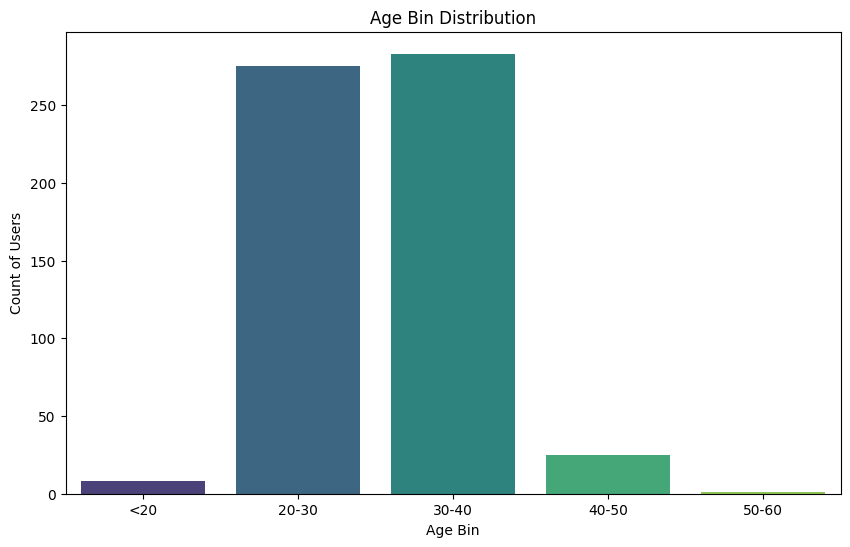

In [ ]:
# Plotting the age bin distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=age_bin_count.index, y=age_bin_count.values, palette='viridis')
plt.title('Age Bin Distribution')
plt.xlabel('Age Bin')
plt.ylabel('Count of Users')
plt.show()

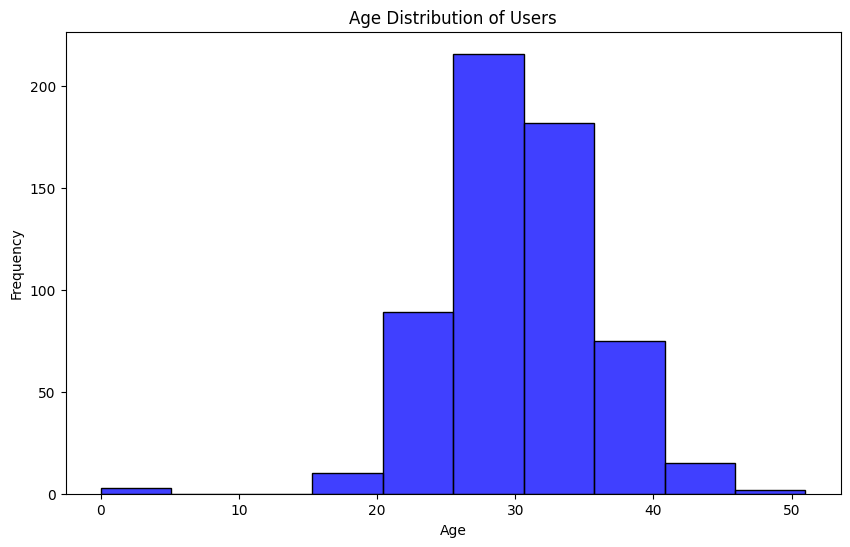

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(age_count['userAge'], bins=10, kde=False, color='blue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-61-b848aebbfeec>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_count['userAge'], shade=True, color='green')


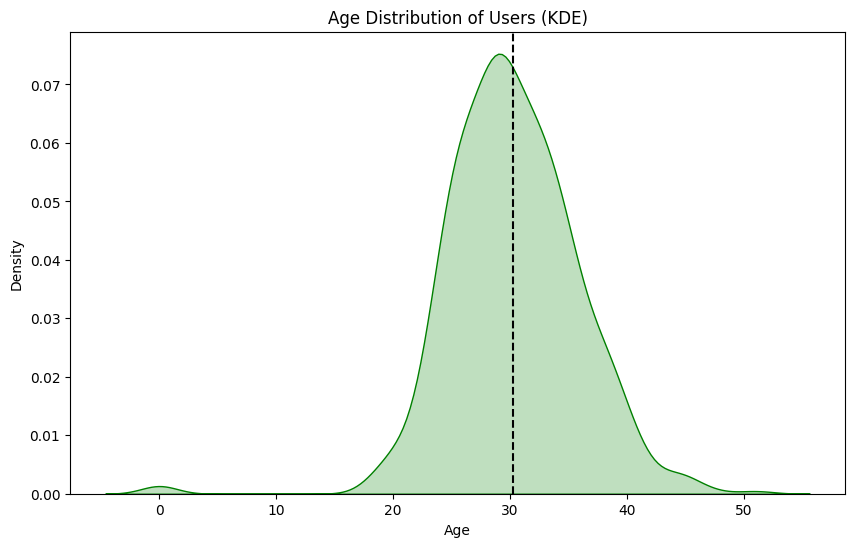

In [ ]:
# Plotting the age distribution using a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(age_count['userAge'], shade=True, color='green')
plt.axvline(age_count['userAge'].mean(), color= "black", linestyle="--")
plt.title('Age Distribution of Users (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [ ]:
duration_mean_agebin= data.pivot_table('duration',
                                 index='audioLanguage',
                                 columns='Age_Bin',
                                 aggfunc='mean')
duration_mean_agebin[:20]

Age_Bin          <20     20-30     30-40      40-50  50-60
audioLanguage                                             
hausa          13.76  9.580773  7.920932  13.276000    NaN
ibibio          4.50  6.940929  8.703636   6.990000    NaN
igbo            6.90  9.622321  9.361070   9.402857    NaN
pidgin          7.80  7.068000  6.686667  10.590000    NaN
yoruba           NaN  9.929245  8.916000   7.230000   8.88

In [ ]:
data.describe()

userAge      duration
count  85618.000000  85618.000000
mean      30.230174      7.244090
std        5.120596      3.612885
min        0.000000      0.000000
25%       27.000000      4.920000
50%       29.000000      6.420000
75%       34.000000      8.640000
max       51.000000    174.420000

**Text Analysis**

In [ ]:
def clean_text(text):
  text= re.sub('[^A-Za-z ]', '', text)
  text= text.lower()
  return text

In [ ]:
data[:5]

userId  \
0  66672f51fb189b2d8ae0b640   
1  66672f51fb189b2d8ae0b640   
2  66688bff70d14cc883d8d7d8   
3  66672f51fb189b2d8ae0b640   
4  66672f51fb189b2d8ae0b640   

                                                text audioLanguage identifier  \
0  Expresses interest in an online marketplace bu...         hausa          A   
1  Seeks a reliable partner to conduct clinical t...         hausa          A   
2  Expresses interest in rooftop garden technolog...          igbo          A   
3  Acknowledges the innovation of virtual reality...         hausa          A   
4  Expresses interest in partnering for a clinica...         hausa          A   

                        domain                    scenario  \
0  Negotiating a Business Deal           Food and beverage   
1  Negotiating a Business Deal  Healthcare_pharmaceuticals   
2  Negotiating a Business Deal           Food and beverage   
3  Negotiating a Business Deal  Healthcare_pharmaceuticals   
4  Negotiating a Business Deal  Healthcare_pharmaceuticals   

          userFirstname userLastname userGender  userAge userAccent  duration  \
0                  Abba        Adamu       male     31.0      Hausa      7.98   
1                  Abba        Adamu       male     31.0      Hausa      7.26   
2  Augustus Chukwuebuka   Okoronnaya       male     31.0       Igbo     14.16   
3                  Abba        Adamu       male     31.0      Hausa     11.22   
4                  Abba        Adamu       male     31.0      Hausa      6.60   

                          fullName clean_identifier   mail Age_Bin  
0                       Abba Adamu                A  gmail   30-40  
1                       Abba Adamu                A  gmail   30-40  
2  Augustus Chukwuebuka Okoronnaya                A  gmail   20-30  
3                       Abba Adamu                A  gmail     <20  
4                       Abba Adamu                A  gmail   20-30

In [ ]:
data.tail()

userId  \
85613  6667307cfb189b2d8ae0c128   
85614  6667600cfb189b2d8ae15826   
85615  6667307cfb189b2d8ae0c128   
85616  666a9c1f19bff244d8a58c9e   
85617  6667600cfb189b2d8ae15826   

                                                    text audioLanguage  \
85613  Yes, providing tangible recognition can show d...       english   
85614  Certainly. How does our platform compare to co...       english   
85615  We need to establish proper storage facilities...       english   
85616  Proactive planning demonstrates foresight and ...       english   
85617   Of course. How do we stand out from competitors?       english   

      identifier                                             domain  \
85613          B  Discussing on the plan to open a food bank for...   
85614          B  Addressing potential investors on the need for...   
85615          B  Discussing on the plan to open a food bank for...   
85616          B     Describing yourself to an audience of interest   
85617          B  Addressing potential investors on the need for...   

                                                scenario  \
85613  Financial Sustainability_ Developing strategie...   
85614                               Competitive Analysis   
85615  Food Safety and Storage_ Developing protocols ...   
85616                           Problem-Solving Approach   
85617                               Competitive Analysis   

                  userFirstname  userLastname userGender  userAge userAccent  \
85613  iniobonguko144@gmail.com           Uko       male     30.0     Ibibio   
85614                    NYAKNO        BASSEY     female     31.0     Ibibio   
85615  iniobonguko144@gmail.com           Uko       male     30.0     Ibibio   
85616              Juliet Idam   Chinonyerem      female     24.0       Igbo   
85617                    NYAKNO        BASSEY     female     31.0     Ibibio   

       duration                      fullName clean_identifier   mail Age_Bin  
85613  8.362667  iniobonguko144@gmail.com Uko                B  gmail     NaN  
85614  7.560000                 NYAKNO BASSEY                B  gmail     NaN  
85615  9.898667  iniobonguko144@gmail.com Uko                B  gmail     NaN  
85616  8.700000     Juliet Idam  Chinonyerem                 B  gmail     NaN  
85617  7.320000                 NYAKNO BASSEY                B  gmail     NaN

In [ ]:
data['clean_text']= data.text.apply(clean_text)
data[:5]



In [ ]:
data.text

In [ ]:
data.clean_text

In [ ]:
#data.clean_text= data.clean_text.astype(str)

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import spacy

In [ ]:
nlp= spacy.blank("en")
nlp= spacy.load("en_core_web_sm")

In [ ]:
allwords = " ".join([txt for txt in data.clean_text])
allwords

'expresses interest in an online marketplace but asks about ensuring visibility for artisanal chocolates seeks a reliable partner to conduct clinical trials for a new medical device expresses interest in rooftop garden technology but asks about adaptation to specific climate conditions acknowledges the innovation of virtual reality rehabilitation therapy but asks if it can be adapted for patients with cognitive impairments expresses interest in partnering for a clinical trial on a new alzheimers treatment assures adherence to strict ethical guidelines and rigorous safety testing in the development of the technology your construction law litigation experience is impressive but can you offer a fixed fee for resolving a minor contract dispute with a vendor lets discuss what assurances do you need for data migration the bandwidth increase will ensure seamless video conferencing for your remote team looks impressive but ensuring sufficient lighting to showcase the clothing is crucial acknow

In [ ]:
doc = nlp(allwords)
tokens_without_stopwords = [token.text for token in doc if not token.is_stop]

ValueError: [E088] Text of length 5929603 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [ ]:
len(allwords)

In [ ]:
tokens_without_stopwords = [token.text for token in doc if not token.is_stop]

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Example text (split into chunks)
chunks = [allwords[i:i+1000000] for i in range(0, len(allwords), 1000000)]

tokens_without_stopwords = []

for chunk in chunks:
    doc = nlp(chunk)
    tokens_without_stopwords.extend([token.text for token in doc if not token.is_stop])

filtered_text = ' '.join(tokens_without_stopwords)

In [ ]:
chunks = [allwords[i:i+1000000] for i in range(0, len(allwords), 1000000)]
tokens_without_stopwords = []

In [ ]:
for chunk in chunks:
    doc = nlp(chunk)
    tokens_without_stopwords.extend([token.text for token in doc if not token.is_stop])

In [ ]:
filtered_text = ' '.join(tokens_without_stopwords)

In [ ]:
from wordcloud import WordCloud

allwords = " ".join([txt for txt in data.clean_text])

wordcloud= WordCloud(width= 500, height= 300,
                     random_state= 21,
                     max_font_size= 119).generate(allwords)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
data['clean_text']= data.text.apply(clean_text)
data[:5]